In [3]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import frame_transform_graph
from astropy.coordinates.matrix_utilities import matrix_transpose, rotation_matrix

In [ ]:
#Infos UIRAPURU.

instrument_name = 'uirapuru'
instrument_alt = 75
instrument_lat = -7.211637
instrument_lon = -35.908138
instrument_elev = 553
instrument_az = 0


#azimute é o angulo horizontal que vai do norte para o leste, 0 é o norte e varia de 0 a 360 graus
#altitude é o angulo vertical que vai de 0 a 90 graus, 0 é o horizonte e 90 é o zênite.

        Use get_body("moon") instead. [warnings]


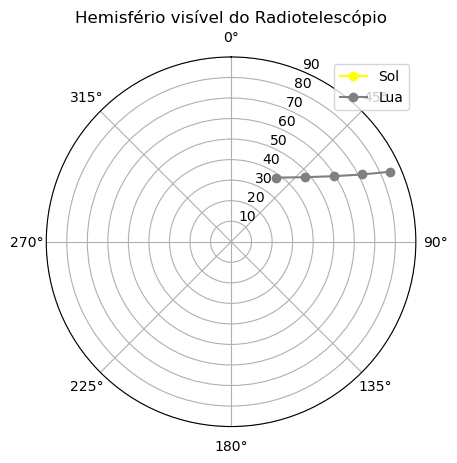

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, AltAz, get_sun, get_moon
from astropy.time import Time
import astropy.units as u

# Configurar a localização do radiotelescópio (exemplo: Green Bank, WV, EUA)
location = EarthLocation(lat=-7.211637 * u.deg, lon=-35.908138 * u.deg, height=553 * u.m)

# Definir o tempo de observação: 24 horas
times = Time.now() + np.arange(0, 5, 1) * u.hour  # 24 horas a partir de agora

# Converter os tempos para o sistema AltAz
altaz_frame = AltAz(obstime=times, location=location)

# Obter as posições do Sol e da Lua
sun_altaz = get_sun(times).transform_to(altaz_frame)
moon_altaz = get_moon(times).transform_to(altaz_frame)

# Criar um gráfico de hemisfério
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title("Hemisfério visível do Radiotelescópio")

# Plotar os objetos
# Plotar o Sol
ax.plot(np.radians(sun_altaz.az), 90 - sun_altaz.alt.deg, label='Sol', color='yellow', marker='o')

# Plotar a Lua
ax.plot(np.radians(moon_altaz.az), 90 - moon_altaz.alt.deg, label='Lua', color='gray', marker='o')

#legendas e rótulos
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_ylim(0, 90)  # Limitar a altitude de 0 a 90 graus

#grade
ax.grid(True)

#legendas
ax.legend(loc='upper right')

plt.show()



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, AltAz, SkyCoord, Basemap
from astropy.time import Time
import astropy.units as u

# Localização do radiotelescópio
location = EarthLocation(lat=-7.211637 * u.deg, lon=-35.908138 * u.deg, height=553 * u.m)

times = Time.now() + np.arange(0, 24, 1) * u.hour

# Transformar os tempos para AltAz
altaz_frame = AltAz(obstime=times, location=location)

# Coordenadas das fontes de rádio
sources = {
    'Sagittarius A': SkyCoord(ra=17.7603 * u.hourangle, dec=-29.007 * u.deg),
    'Centaurus A (NGC 5128)': SkyCoord(ra=13.2270 * u.hourangle, dec=-43.020 * u.deg),
    'Puppis A': SkyCoord(ra=7.1000 * u.hourangle, dec=-45.020 * u.deg)
}

#Gráfico usando Basemap
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')


ax.grid(True)
ax.set_title("Fontes de Rádio no Hemisfério Sul Celeste")

# Plotar cada fonte
for name, coord in sources.items():
    altaz = coord.transform_to(altaz_frame)
    ax.scatter(np.radians(altaz.az.deg - 180), np.radians(90 - altaz.alt.deg), label=name)

plt.legend()
plt.show()



ImportError: cannot import name 'Basemap' from 'astropy.coordinates' (/home/erik/miniforge3/envs/BINGOcg/lib/python3.12/site-packages/astropy/coordinates/__init__.py)

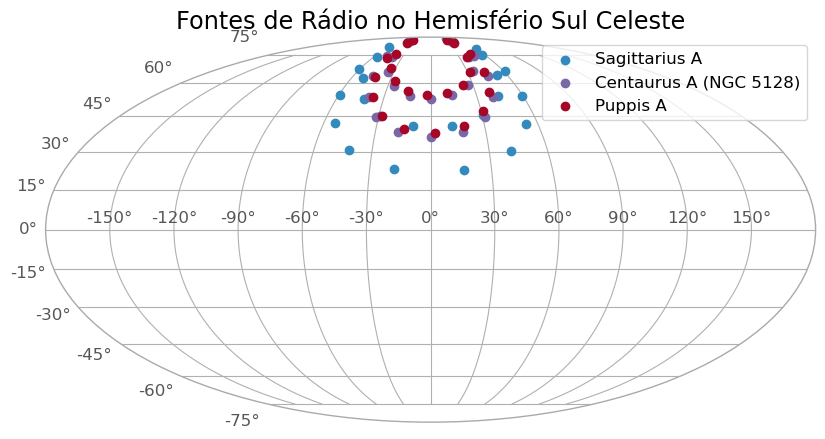

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy.time import Time
import astropy.units as u
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

# Localização do UIRAPURU
location = EarthLocation(lat=-7.211637 * u.deg, lon=-35.908138 * u.deg, height=553 * u.m)

times = Time.now() + np.arange(0, 24, 1) * u.hour

altaz_frame = AltAz(obstime=times, location=location)

sources = {
    'Sagittarius A': SkyCoord(ra=17.7603 * u.hourangle, dec=-29.007 * u.deg),
    'Centaurus A (NGC 5128)': SkyCoord(ra=13.2270 * u.hourangle, dec=-43.020 * u.deg),
    'Puppis A': SkyCoord(ra=7.1000 * u.hourangle, dec=-45.020 * u.deg)
}

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')

ax.grid(True)
ax.set_title("Fontes de Rádio no Hemisfério Sul Celeste")

for name, coord in sources.items():
    altaz = coord.transform_to(altaz_frame)
    ax.scatter(np.radians(altaz.az.deg - 180), np.radians(90 - altaz.alt.deg), label=name)

plt.legend()
plt.show()
